In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from skimage import data
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.transform import resize

In [4]:
# Load the cameraman dataset from skimage
image = data.camera()

In [5]:
# Convert the image to grayscale if it's not already
if len(image.shape) > 2:
    image = rgb2gray(image)

In [6]:
# Resize the image to a smaller size for faster processing
image = resize(image, (128, 128))

In [7]:
# Convert the image to a PyTorch tensor
image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

In [8]:
# Define a Gaussian blur kernel
blur_kernel = torch.tensor([[1, 2, 1], [2, 4, 2], [1, 2, 1]], dtype=torch.float32) / 16

In [9]:
# Apply the convolution operation to blur the image
blurred_image = F.conv2d(image_tensor, blur_kernel.unsqueeze(0).unsqueeze(0), padding=1)

In [10]:
# Convert the blurred image tensor back to a NumPy array
blurred_image = blurred_image.squeeze(0).squeeze(0).numpy()

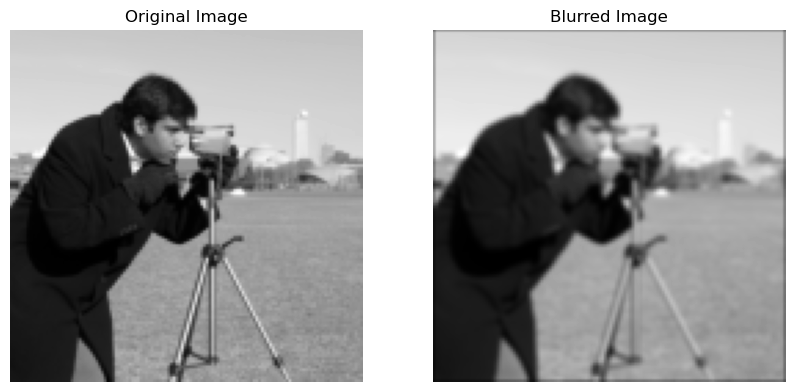

In [11]:
# Display the original and blurred images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Blurred Image")
plt.imshow(blurred_image, cmap="gray")
plt.axis("off")
plt.show()